<h1 style="text-align:center">Titanic : Machine Learning from Disaster</h1>

<h3 style="text-align:center">Load Libraries</h3>

In [1]:
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# from pandas import read_csv
# from pandas import set_option
# from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensemble algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


C:\Users\Melan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3 style="text-align:center">Load Dataset</h3>

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<h3 style="text-align:center">Analyze Data</h3>

In [3]:
# shape 
print(train_df.shape)

(891, 12)


In [4]:
# Peek at the first 10 rows of the data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Peet at the last 10 rows of the data
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
# types
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


We can see some values are missing (NaN : Not a Number) <br>
Let's see what are the attributes missing and how many they are

In [7]:
# Summarize all the missing values in each column in the train set
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Summarize all the missing values in each column in the train set
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_df.drop('PassengerId', axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3 style="text-align:center">Visualize Data</h3>

We need to understand the data in order to get the best results from machine learning algorithms. <br>
The fastest way is to use data visualization.

Survived
0    549
1    342
dtype: int64


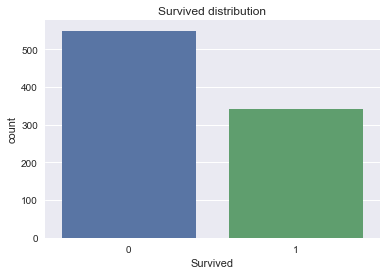

In [10]:
print( train_df.groupby("Survived").size() )

sns.countplot(x="Survived", data=train_df)
plt.title("Survived distribution")

There's more people from one class (Not Survived) than the other (Survived).

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


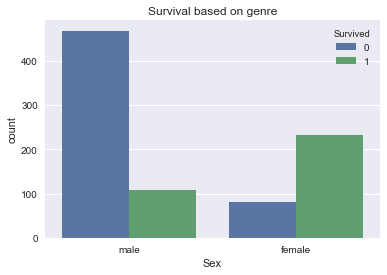

In [11]:
print( train_df.groupby(['Sex','Survived']).size() )

sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival based on genre")

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64


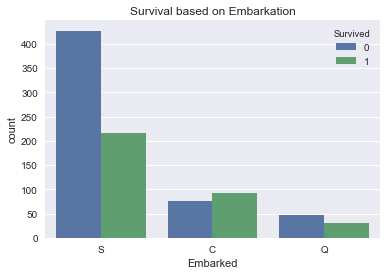

In [12]:
print( train_df.groupby(['Embarked','Survived']).size() )

sns.countplot(x="Embarked", hue="Survived", data=train_df)
plt.title("Survival based on Embarkation")

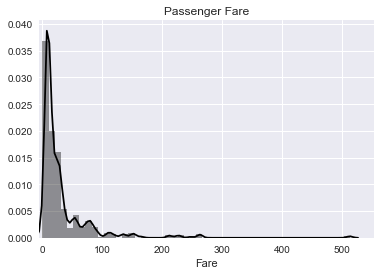

In [13]:
sns.distplot(train_df.Fare, color="k")
plt.xlim(-5, None)
plt.title("Passenger Fare")

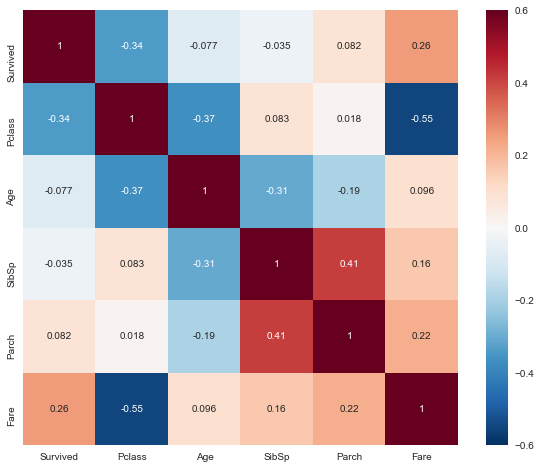

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.drop('PassengerId', axis=1).corr(), annot=True, square=True, vmax=0.6)
# to delete after data manipulation

<h3 style="text-align:center">Feature Engineering </h3>

We will manipulate the features for them to be the most comprehensible for the machine learning algorithms

<u>Sex</u>

In [15]:
def transform_sex(dataset):
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

transform_sex(train_df)
transform_sex(test_df)

<u>Age</u>

In [16]:
# fill missing Age
def fill_age(dataset):
    age_mean = dataset['Age'].mean()
    age_std  = dataset['Age'].std()
    fill_values = np.random.uniform(age_mean - age_std, age_mean + age_std)
    dataset['Age'] = dataset['Age'].fillna(value=fill_values).astype(int)

fill_age(train_df)

In [17]:
train_df['Age'].describe()

count    891.000000
mean      27.557800
std       13.691619
min        0.000000
25%       19.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
# Transform Age
# We will use 4 values for the Age : 
#0 for the first 25% values (<16), 1 for Age between [25%,50%]->(16-24), 2 for Age between[50%,75%]->(24,35) and 3 for above (>35)

# Note for operators : Another common operation is the use of boolean vectors to filter the data. 
# The operators are: | for or, & for and, and ~ for not. These must be grouped by using parentheses.

def transform_age(dataset):
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 # select rows where condition is True and select only the 'Age' column
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 24) , 'Age'] = 1
    dataset.loc[ (dataset['Age'] > 24) & (dataset['Age'] <= 35) , 'Age'] = 2
    dataset.loc[ dataset['Age'] > 35, 'Age'] = 3

transform_age(train_df)

<u>Embarked</u>

In [19]:
train_df.groupby('Embarked').size() 

Embarked
C    168
Q     77
S    644
dtype: int64

In [20]:
def transform_embarked(dataset):
    """Mapping Embarked feature by most common elements""" 
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

def fill_embarked(dataset):
    """Fill missing values in this feature"""
    dataset['Embarked'].fillna(value='S', inplace=True)
    
fill_embarked(train_df)
transform_embarked(train_df)

<u>Fare</u>

In [22]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
def transform_fare(dataset):
    """Transform Fare features into 4 values corresponding to the first [25%]->(<7.91), values between [25%,50%]->(7.91, 14.45),
    values between [50%, 75%]->(14.45, 31) and above [>75%]
    """
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare' ] = 0
    dataset.loc[ (dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.45), 'Fare' ] = 1
    dataset.loc[ (dataset['Fare'] > 14.45) & (dataset['Fare'] <= 31), 'Fare' ] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare' ] = 3
        
    dataset['Fare'] = dataset['Fare'].astype(int)

transform_fare(train_df)

In [24]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",1,2,0,0,349257,0,NaN,0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",0,1,0,0,7552,1,NaN,0
883,884,0,2,"Banfield, Mr. Frederick James",1,2,0,0,C.A./SOTON 34068,1,NaN,0
884,885,0,3,"Sutehall, Mr. Henry Jr",1,2,0,0,SOTON/OQ 392076,0,NaN,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,3,0,5,382652,2,NaN,2
886,887,0,2,"Montvila, Rev. Juozas",1,2,0,0,211536,1,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,2,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,2,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",1,2,0,0,111369,2,C148,1
890,891,0,3,"Dooley, Mr. Patrick",1,2,0,0,370376,0,NaN,2
